In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from capsule_network import CapsNet, load_coco

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test), id_category = load_coco('capsnet_train_data.h5', '../dataset/coco_raw.pickle')
print('x_train', x_train.shape)
print('y_train', y_train.shape)


Loading dataset...
Done.
x_train (10000, 250, 250, 3)
y_train (10000, 80)


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


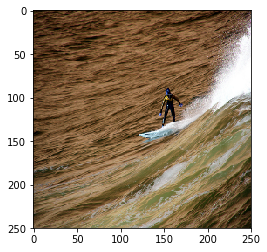

In [3]:
# Display sample image and label
print(y_train[1])
plt.imshow(x_train[1])
plt.show()

In [4]:
input_shape = x_train.shape[1:]
n_class = y_train.shape[1]
routings = 3

In [5]:
model, eval_model, manipulate_model = CapsNet(input_shape, n_class, routings)

In [6]:
model.load_weights('result/weights-01.h5')

In [7]:
def load_image(path, size=None, grayscale=False):
    """
    Load the image from the given file-path and resize it
    to the given size if not None.
    """

    # Load the image using opencv
    if not grayscale:  # BGR format
        image = cv2.imread(path)
    else:  # grayscale format
        image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    # Resize image if desired.
    if not size is None:
        image = cv2.resize(image, size)

    # Convert image to numpy array and scale pixels so they fall between 0.0 and 1.0
    image = np.array(image) / 255.0

    # Convert 2-dim gray-scale array to 3-dim BGR array.
    if (len(image.shape) == 2):
        image = np.repeat(image[:, :, np.newaxis], 3, axis=2)

    return image

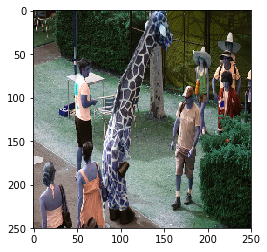

In [8]:
img = load_image('../dataset/val2017/000000288584.jpg', size=x_train.shape[1:3])
image_batch = np.expand_dims(img, axis=0)
plt.imshow(img)
plt.show()

In [9]:
y = eval_model.predict(image_batch)

In [10]:
# Predicted label
y[0]

array([[0.00031623, 0.00031623, 0.00031623, 0.00031623, 0.00031623,
        0.00031623, 0.00031623, 0.00031623, 0.00031623, 0.00031623,
        0.00031623, 0.00031623, 0.00031623, 0.00031623, 0.00031623,
        0.00031623, 0.00031623, 0.00031623, 0.00031623, 0.00031623,
        0.00031623, 0.00031623, 0.00031623, 0.00031623, 0.00031623,
        0.00031623, 0.00031623, 0.00031623, 0.00031623, 0.00031623,
        0.00031623, 0.00031623, 0.00031623, 0.00031623, 0.00031623,
        0.00031623, 0.00031623, 0.00031623, 0.00031623, 0.00031623,
        0.00031623, 0.00031623, 0.00031623, 0.00031623, 0.00031623,
        0.00031623, 0.00031623, 0.00031623, 0.00031623, 0.00031623,
        0.00031623, 0.00031623, 0.00031623, 0.00031623, 0.00031623,
        0.00031623, 0.00031623, 0.00031623, 0.00031623, 0.00031623,
        0.00031623, 0.00031623, 0.00031623, 0.00031623, 0.00031623,
        0.00031623, 0.00031623, 0.00031623, 0.00031623, 0.00031623,
        0.00031623, 0.00031623, 0.00031623, 0.00

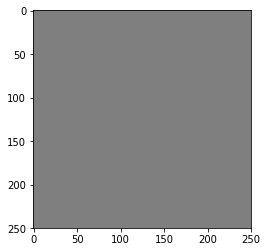

In [11]:
# Reconstructed image
plt.imshow(y[1][0])
plt.show()